In [45]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [46]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

In [47]:
HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)  # feedforward and feedback

_, _, _, _, HCrt = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

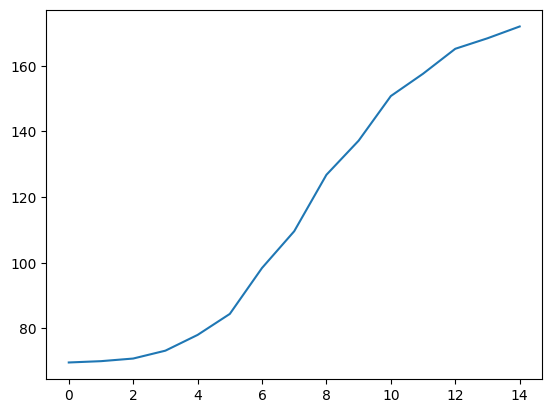

In [48]:
plt.plot(HCrt)

## HC Training

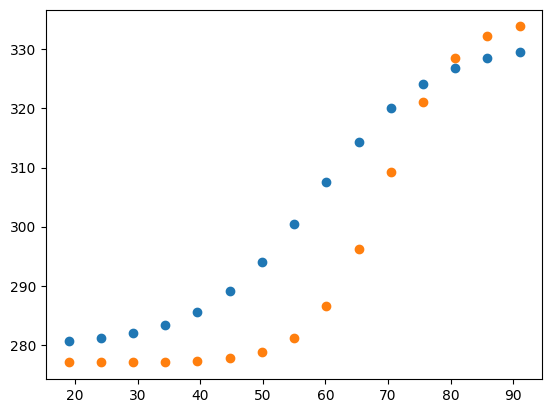

In [49]:
##Pre-Training
###Healthy Controls
ymin = 280
ymax = 331
fprHCCP = 100 - 1.377 * v
fprHCS = 1 / 0.11  # negative

HC_RTs = RTsig(a_distances, fprHCCP, fprHCS)

##Post-Training
###Healthy Controls
ymin = 277
ymax = 335
fpostHCCP = 100 - 1.028 * v
fpostHCS = 1 / 0.18  # negative

HC_RTs_post = RTsig(a_distances, fpostHCCP, fpostHCS)

plt.scatter(a_distances, HC_RTs)
plt.scatter(a_distances, HC_RTs_post)

In [62]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

k_a = 5e-05
k_v = 5e-05
theta = 0.05
stim_counts = 10

HCWa_tr, HCWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, HCrtpost = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa_tr[:, :, -1, -1],
    HCWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [63]:
HC_RTs_model_post = fit_RT(HCrtpost, HC_RTs_post)
HC_RTs_model_pre = fit_RT(HCrt, HC_RTs)

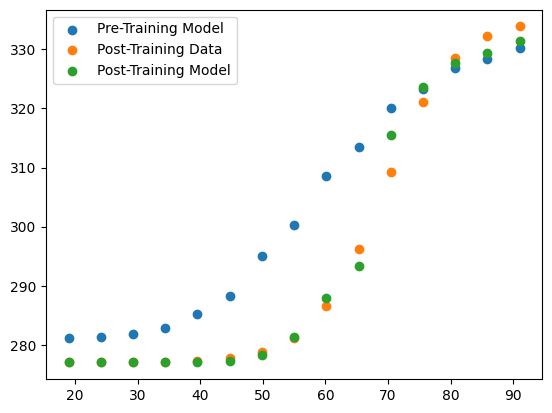

In [64]:
# plt.scatter(a_distances,HC_RTs, label="Pre-Training Data")
plt.scatter(a_distances, HC_RTs_model_pre, label="Pre-Training Model")
plt.scatter(a_distances, HC_RTs_post, label="Post-Training Data")
plt.scatter(a_distances, HC_RTs_model_post, label="Post-Training Model")
plt.legend()

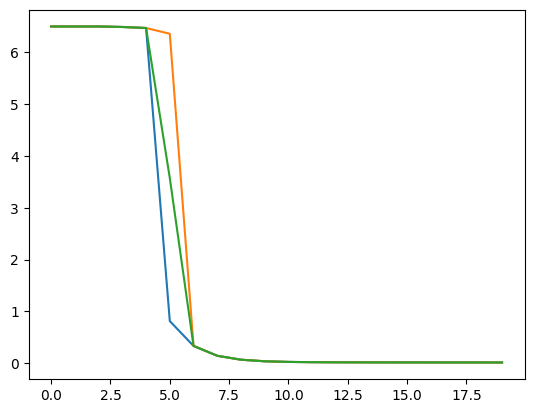

In [65]:
plt.plot(HCWa_tr[:, :, -1, -1])

## SCZ Training

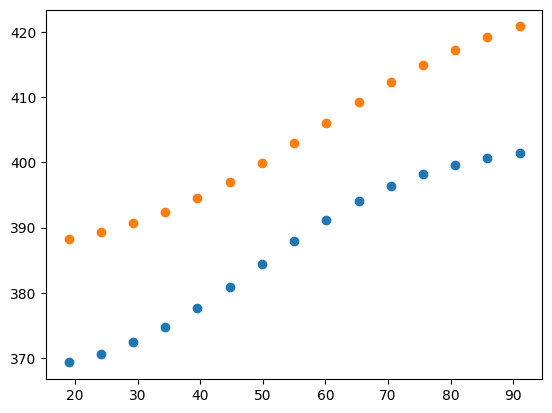

In [50]:
##Pre-Training
###SCZ
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(a_distances, scz_cp, scz_slope)

##Post-Training
###SCZ
ymin = 385
ymax = 426
scz_cp_post = 100 - 1.361 * v
scz_slope_post = 1 / 0.061  # negative

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

plt.scatter(a_distances, SCZ_RTs)
plt.scatter(a_distances, SCZ_RTs_post)

In [78]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex, Pr = 1.963e00, 1.044e-01

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
_, _, _, _, SCZrt = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

In [89]:
SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)
print("Training complete")
_, _, _, _, SCZrtpost = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

Training complete


In [95]:
SCZ_RTs_model_post = fit_RT(SCZrtpost, SCZ_RTs_post)
SCZ_RTs_model_pre = fit_RT(SCZrt, SCZ_RTs_post)

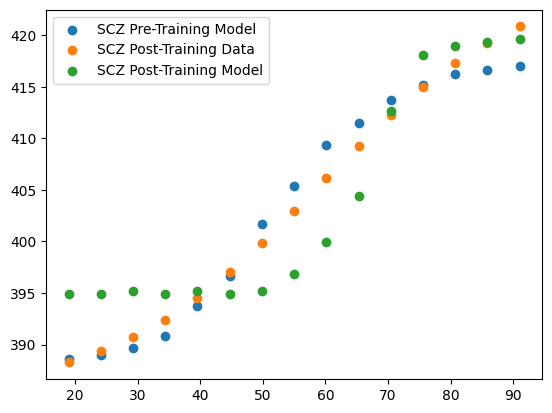

In [97]:
# plt.scatter(a_distances, SCZ_RTs, label="SCZ Pre-Training Data")
plt.scatter(a_distances, SCZ_RTs_model_pre, label="SCZ Pre-Training Model")
plt.scatter(a_distances, SCZ_RTs_post, label="SCZ Post-Training Data")
plt.scatter(a_distances, SCZ_RTs_model_post, label="SCZ Post-Training Model")
plt.legend()

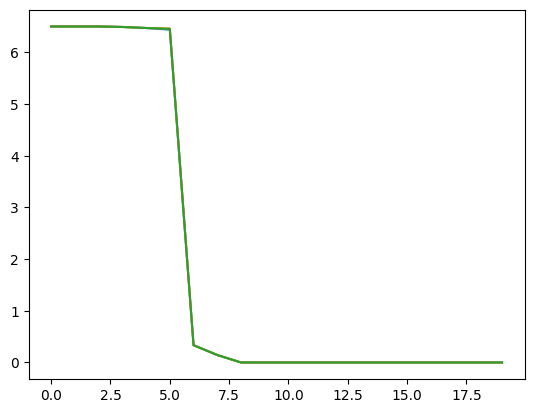

In [100]:
plt.plot(SCZWa_tr[:, :, -1, -1])

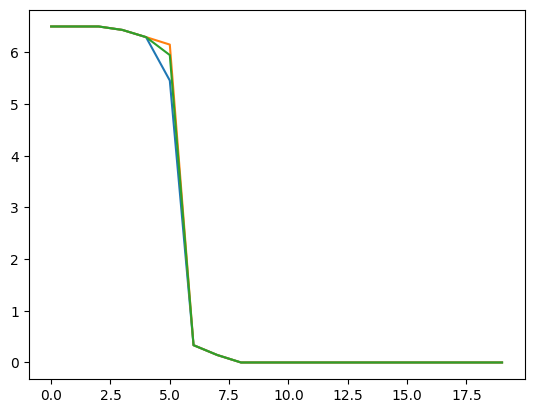

In [103]:
plt.plot(SCZWa_tr[:, :, 0, -1])

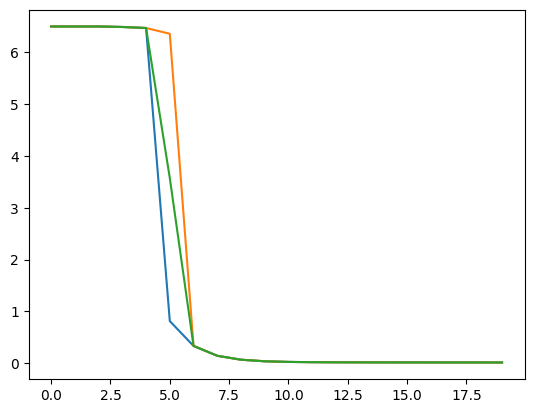

In [99]:
plt.plot(HCWa_tr[:, :, -1, -1])

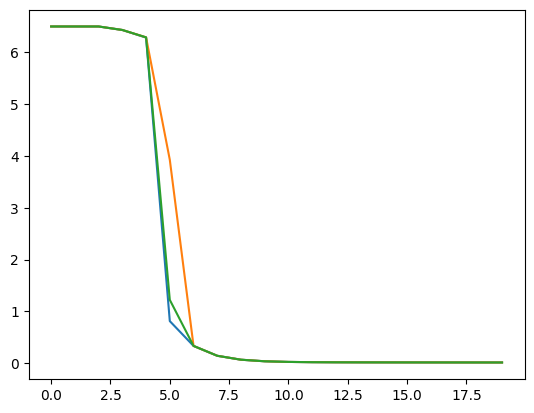

In [102]:
plt.plot(HCWa_tr[:, :, 0, -1])